<a href="https://colab.research.google.com/github/Josemb2001/chema/blob/main/retoa01552255.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **TU MEJOR SELECCIÓN DE ARMAS EN COD**



# **Descripción de la base de datos**

La base de datos se centra en el videojuego móvil Call of Duty - Mobile y su contenido consiste en información sobre las armas disponibles en el juego. La importancia de esta base de datos es encontrar la mejor combinación de armas y habilidades. La base de datos contiene información sobre las armas primarias, secundarias y arrojadizas, y está categorizada en diferentes tipos y subtipos. La base de datos puede incluir variables como el nombre del arma, categoría, tipo, imagen, daño, precisión, rango, velocidad de disparo, movilidad, control, radio y duración. La base de datos puede ser útil para los jugadores de Call of Duty - Mobile que deseen comparar y seleccionar las armas adecuadas para su estilo de juego.

# **Descripción de variables**

Las variables incluidas son:

*   name: el nombre de cada arma en el juego. | Cualitativa nominal (string)
*   category: la categoría de cada arma, como "rifles de asalto", "subfusiles", "escopetas", "pistolas", etc. | Cualitativa nominal (string)
*  type: el tipo de arma dependiendo si se encuentra en las armas primarias, secundarias, arrojadizas. | Cualitativa nominal (string)
* image: una imagen de cada arma en el juego. | (archivo de imagen)
* Damage: la cantidad de daño que inflige cada arma. | Cuantitativa continua(integer o float)
* Accuracy: la precisión de cada arma al apuntar. | Cuantitativa continua (integer o float)
* Range: la distancia máxima a la que cada arma puede disparar con precisión. | Cuantitativa continua (integer o float)
* Fire Rate: la velocidad a la que cada arma puede disparar. | Cuantitativa continua (integer o float)
* Mobility: la velocidad y la facilidad de movimiento con cada arma equipada. | Cuantitativa continua  (integer o float)
* Control: la facilidad de controlar cada arma mientras se dispara. | Cuantitativa continua (integer o float)
* Radius: el alcance del daño en un área cuando se utiliza un ataque especial asociado con el arma. | Cuantitativa continua (integer o float)
* Duration: la duración del efecto de un ataque especial asociado con el arma. | Cuantitativa continua (integer o float)




## **Preparación de la base de datos**

In [ ]:
wd = '/content/drive/MyDrive/dataarmas - data.csv' #Se importo la base de datos

In [ ]:
#Se importaron librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder



In [ ]:
#Visualización de la base de datos
df = pd.read_csv(wd)
df.head()

,Unnamed: 0,ID,name,category,type,image,Damage,Accuracy,Range,Fire Rate,Mobility,Control,Radius,Duration
0,0,157,AGR 556,SMG,primary,images/primary/AGR 556.jpg,25.0,37.0,47.0,75.0,98.0,47.0,NaN,NaN
1,1,9,AK-47,Assault,primary,images/primary/AK-47.jpg,33.0,67.0,58.0,55.0,74.0,44.0,NaN,NaN
2,2,11,AK117,Assault,primary,images/primary/AK117.jpg,25.0,62.0,45.0,77.0,75.0,46.0,NaN,NaN
3,3,174,AS VAL,Assault,primary,images/primary/AS VAL.jpg,28.0,44.0,50.0,80.0,83.0,47.0,NaN,NaN
4,4,14,ASM10,Assault,primary,images/primary/ASM10.jpg,34.0,72.0,48.0,55.0,68.0,52.0,NaN,NaN


In [ ]:
df.columns

Index(['Unnamed: 0', 'ID', 'name', 'category', 'type', 'image', 'Damage',
       'Accuracy', 'Range', 'Fire Rate', 'Mobility', 'Control', 'Radius',
       'Duration'],
      dtype='object')

In [ ]:
df= df.drop(['Unnamed: 0', 'ID','image'], axis=1) #se eliminaron columnas no deseadas

In [ ]:
valores= df.isnull().sum()
valores

name          0
category      0
type          0
Damage       10
Accuracy     17
Range        17
Fire Rate    17
Mobility     17
Control      17
Radius       85
Duration     92
dtype: int64

In [ ]:
#Se rellenaron valores nulos
df['Damage'] = df['Damage'].fillna(0)
df['Accuracy'] = df['Accuracy'].fillna(0)
df['Range'] = df['Range'].fillna(0)
df['Fire Rate'] = df['Fire Rate'].fillna(0)
df['Mobility'] = df['Mobility'].fillna(0)
df['Control'] = df['Control'].fillna(0)
df['Radius'] = df['Radius'].fillna(0)
df['Duration'] = df['Duration'].fillna(0)


In [ ]:
print(df[['category', 'Damage']])



     category  Damage
0         SMG    25.0
1     Assault    33.0
2     Assault    25.0
3     Assault    28.0
4     Assault    34.0
..        ...     ...
97     Lethal    60.0
98   Tactical     0.0
99     Lethal    40.0
100    Lethal    65.0
101  Tactical     0.0

[102 rows x 2 columns]


In [ ]:
df.loc[df['category'] == 'Shotgun', 'Damage'] = 168

In [ ]:
df.loc[df['name'] == 'Shorty', 'Damage'] = 168

In [ ]:
df

,name,category,type,Damage,Accuracy,Range,Fire Rate,Mobility,Control,Radius,Duration
0,AGR 556,SMG,primary,25.0,37.0,47.0,75.0,98.0,47.0,0.0,0.0
1,AK-47,Assault,primary,33.0,67.0,58.0,55.0,74.0,44.0,0.0,0.0
2,AK117,Assault,primary,25.0,62.0,45.0,77.0,75.0,46.0,0.0,0.0
3,AS VAL,Assault,primary,28.0,44.0,50.0,80.0,83.0,47.0,0.0,0.0
4,ASM10,Assault,primary,34.0,72.0,48.0,55.0,68.0,52.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
97,Sticky Grenade,Lethal,throwable,60.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0
98,Storm Ball,Tactical,throwable,0.0,0.0,0.0,0.0,0.0,0.0,60.0,70.0
99,Thermite,Lethal,throwable,40.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0
100,Trip Mine,Lethal,throwable,65.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0


In [ ]:
df.values


array([['AGR 556', 'SMG', 'primary', ..., 47.0, 0.0, 0.0],
       ['AK-47', 'Assault', 'primary', ..., 44.0, 0.0, 0.0],
       ['AK117', 'Assault', 'primary', ..., 46.0, 0.0, 0.0],
       ...,
       ['Thermite', 'Lethal', 'throwable', ..., 0.0, 50.0, 0.0],
       ['Trip Mine', 'Lethal', 'throwable', ..., 0.0, 50.0, 0.0],
       ['Trophy System', 'Tactical', 'throwable', ..., 0.0, 40.0, 60.0]],
      dtype=object)

# **PREGUNTAS**

1. **¿Cual es el arma tipo primaria con mas daño del juego?**

In [ ]:
dama = pd.pivot_table(data= df,
                      index = {'name','type'},
                      values={'Damage'})

dama

Damage
type      name                  
primary   AGR 556           25.0
          AK-47             33.0
          AK117             25.0
          AS VAL            28.0
          ASM10             34.0
...                          ...
throwable Sticky Grenade    60.0
          Storm Ball         0.0
          Thermite          40.0
          Trip Mine         65.0
          Trophy System      0.0

[102 rows x 1 columns]

In [ ]:
primarias = df[df['type'] == 'primary']

In [ ]:
pistop = dama.sort_values(['Damage'], ascending=False)

In [ ]:
pistop.iloc[0:10]

Damage
type      name                 
secondary FHJ-18          300.0
          Ice Axe         200.0
          Shovel          200.0
          Machete         200.0
          Baseball Bat    200.0
          Wrench          200.0
          Folding Knife   200.0
          Base Melee      200.0
          Glow Stick      200.0
          Hachi           200.0

In [ ]:
primtop10 = df[df['type'] =='primary'].nlargest(10,'Damage')
primtop10

,name,category,type,Damage,Accuracy,Range,Fire Rate,Mobility,Control,Radius,Duration
7,BY15,Shotgun,primary,168.0,48.0,40.0,29.0,71.0,42.0,0.0,0.0
14,Echo,Shotgun,primary,168.0,49.0,36.0,35.0,82.0,42.0,0.0,0.0
20,HS0405,Shotgun,primary,168.0,45.0,37.0,27.0,74.0,42.0,0.0,0.0
21,HS2126,Shotgun,primary,168.0,40.0,33.0,38.0,71.0,38.0,0.0,0.0
27,KRM 262,Shotgun,primary,168.0,51.0,39.0,28.0,73.0,42.0,0.0,0.0
48,R9-0,Shotgun,primary,168.0,49.0,38.0,34.0,86.0,42.0,0.0,0.0
56,Striker,Shotgun,primary,168.0,49.0,34.0,38.0,73.0,42.0,0.0,0.0
30,Locus,Sniper,primary,95.0,59.0,95.0,28.0,35.0,34.0,0.0,0.0
12,DL Q33,Sniper,primary,90.0,59.0,99.0,28.0,32.0,32.0,0.0,0.0
41,Outlaw,Sniper,primary,90.0,71.0,90.0,28.0,41.0,41.0,0.0,0.0


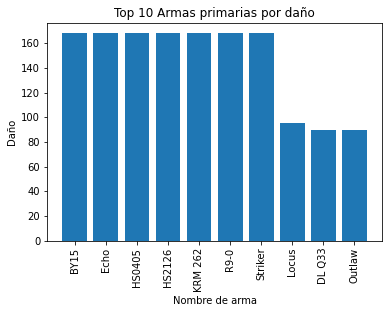

In [ ]:
plt.bar(primtop10['name'],primtop10['Damage'])
plt. title('Top 10 Armas primarias por daño')
plt.xlabel('Nombre de arma')
plt.ylabel('Daño')
plt.xticks(rotation=90)
plt.show()

**CONCLUSIÓN**

Podemos visualizar gracias a esta grafica de barras que que las armas primarias con mayor daño son la BY15, Echo, HS0405, KRM 262, R9-0 y Striker, con puntuación de 160 de daño lo que podria ser buena opción tenerlas en tu equipo de combate.





2. **¿En las granadas, entre más grande el radio de alcanze hace mas daño?**

In [ ]:
throw = df[df['type'] == 'throwable']
throw

,name,category,type,Damage,Accuracy,Range,Fire Rate,Mobility,Control,Radius,Duration
85,Cluster Grenade,Lethal,throwable,60.0,0.0,0.0,0.0,0.0,0.0,70.0,0.0
86,Combat Axe,Lethal,throwable,100.0,0.0,0.0,0.0,0.0,0.0,35.0,0.0
87,Concussion Grenade,Tactical,throwable,0.0,0.0,0.0,0.0,0.0,0.0,60.0,65.0
88,Cryo Bomb,Tactical,throwable,0.0,0.0,0.0,0.0,0.0,0.0,40.0,60.0
89,EMP,Tactical,throwable,0.0,0.0,0.0,0.0,0.0,0.0,60.0,55.0
90,Flash Drone,Tactical,throwable,0.0,0.0,0.0,0.0,0.0,0.0,80.0,55.0
91,Flashbang Grenade,Tactical,throwable,0.0,0.0,0.0,0.0,0.0,0.0,60.0,60.0
92,Frag Grenade,Lethal,throwable,50.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0
93,Gas Grenade,Tactical,throwable,0.0,0.0,0.0,0.0,0.0,0.0,70.0,30.0
94,Heartbeat Sensor,Tactical,throwable,0.0,0.0,0.0,0.0,0.0,0.0,60.0,100.0


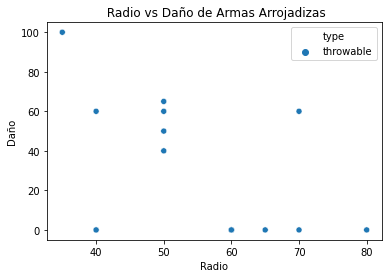

In [ ]:
sns.scatterplot(data=throw, x='Radius', y='Damage', hue='type')
plt.title(' Radio vs Daño de Armas Arrojadizas')
plt.xlabel('Radio')
plt.ylabel('Daño')
plt.axes
plt.show()

**CONCLUSIÓN**

Visualizar con esta gráfica de correlación que no tiene nada que ver el radio de impacto de las arrojadizas con el daño que ejecuta, es decir que la arrojadiza no va a ser ni mas ni menos daño si el radio es mas grande o viceversa. Se puede concluir que el daño de la arrojadiza es con base a su proposito.

3. **¿Cuál de las caracteristicas de las armas primarias y secundarias muestran un rango de valores mas equitativo?**

In [ ]:
singran = df[df['type'] != 'throwable']

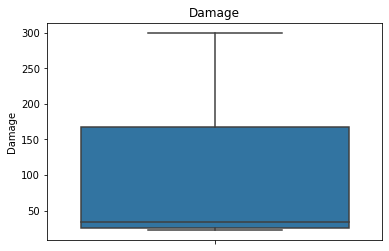

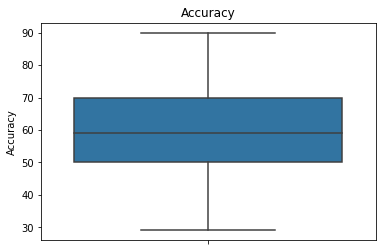

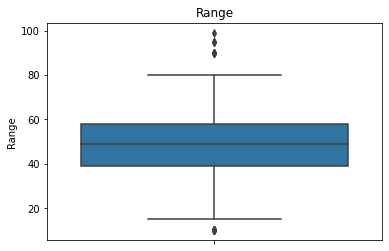

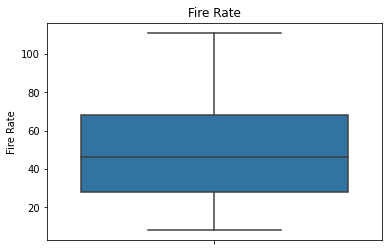

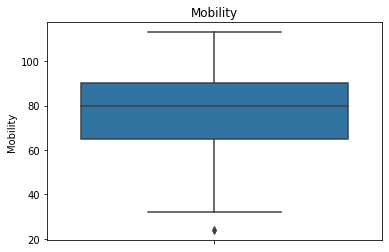

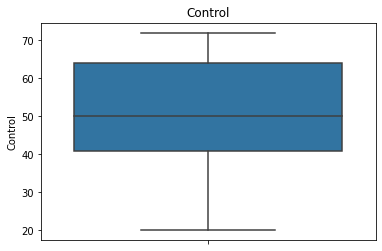

In [ ]:
for var in ['Damage', 'Accuracy', 'Range', 'Fire Rate', 'Mobility', 'Control']:
    plt.figure()
    sns.boxplot(data=singran, y=var)
    plt.title(var)    
    plt.show()

**CONCLUSIÓN**

Podemos concluir que las caracteristicas de las arma en donde los valores son muy parecidos esta en la Precisión y en el Rango, lo que al elegir arma en el juego no seria muy recomendable elegir en base a estas ya si no a otras que tengan una mayor diferencia en el tipo de arma como el Daño.

4. **¿Que tipo de categoria de armas es la que mas abunda?**

In [ ]:
catecontar = df['category'].value_counts().nlargest(10)


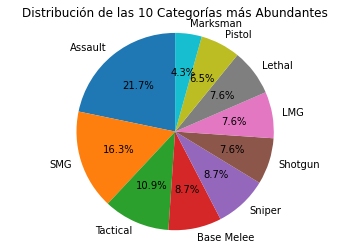

In [ ]:
plt.pie(catecontar.values, labels=catecontar.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de las 10 Categorías más Abundantes')
plt.axis('equal')
plt.show()

**Conclusión**

Podemos visualizar que casi el 50% de las armas mas abundantes dentro del juego abarcan solo tres categorias que son:
* Asalto
* SMG
* Táctico

5. **¿Cual es la realción de preción del arma primaria con base a la distancia de su tiro?**


In [ ]:
prima = df[df['type'] == 'primary']

In [ ]:
rangprima = prima.sort_values(by=['Range'])

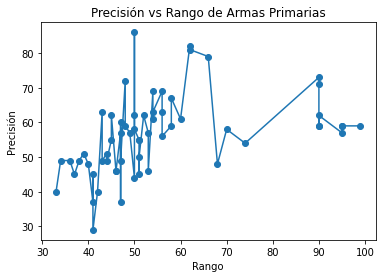

In [ ]:
plt.plot(rangprima['Range'], rangprima['Accuracy'], marker='o')
plt.xlabel('Rango')
plt.ylabel('Precisión')
plt.title('Precisión vs Rango de Armas Primarias')
plt.show()

**Conclusión**

Aunque no es muy marcada podemos observar una pequeña tendencia positiva de si aumenta el rango de tiro, la precisión tambien lo hará. Esto puede tener su sentido debido a los snippers en el juego con gran precisión y rango de tiro.

6. **¿Cuál es el comportamiento de la variable Precisión en las armas?**

In [ ]:
accu = singran['Accuracy']
accu

0     37.0
1     67.0
2     62.0
3     44.0
4     72.0
      ... 
80    52.0
81    70.0
82    70.0
83    50.0
84    70.0
Name: Accuracy, Length: 85, dtype: float64

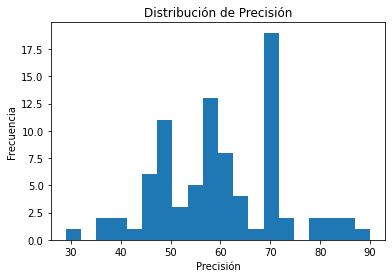

In [ ]:
plt.hist(accu, bins=20)
plt.title('Distribución de Precisión')
plt.xlabel('Precisión')
plt.ylabel('Frecuencia')
plt.show()

**Conclusión**

Se puede visualizar que se presento el comportamiento de Precisión del arma con un intervalo de 10 puntos. Se puede decir que tiene un comportamiento bimodal y sin contar valores atípicos de igual manera se puede decir que esta un poco sesgada a la izquierda aunque sí, la mayoria de datos se encuentras concentrados en el centro.

7. ¿Top 3 de las armas que suman mas puntos con todas sus caracteristicas tanto primarias como secundarias?

In [ ]:
df

,name,category,type,Damage,Accuracy,Range,Fire Rate,Mobility,Control,Radius,Duration
0,AGR 556,SMG,primary,25.0,37.0,47.0,75.0,98.0,47.0,0.0,0.0
1,AK-47,Assault,primary,33.0,67.0,58.0,55.0,74.0,44.0,0.0,0.0
2,AK117,Assault,primary,25.0,62.0,45.0,77.0,75.0,46.0,0.0,0.0
3,AS VAL,Assault,primary,28.0,44.0,50.0,80.0,83.0,47.0,0.0,0.0
4,ASM10,Assault,primary,34.0,72.0,48.0,55.0,68.0,52.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
97,Sticky Grenade,Lethal,throwable,60.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0
98,Storm Ball,Tactical,throwable,0.0,0.0,0.0,0.0,0.0,0.0,60.0,70.0
99,Thermite,Lethal,throwable,40.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0
100,Trip Mine,Lethal,throwable,65.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0


In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/dataarmas - data.csv',
    index_col=[4,3],
    
)
df2

Unnamed: 0   ID            name  \
type      category                                    
primary   SMG                0  157         AGR 556   
          Assault            1    9           AK-47   
          Assault            2   11           AK117   
          Assault            3  174          AS VAL   
          Assault            4   14           ASM10   
...                        ...  ...             ...   
throwable Lethal            97   39  Sticky Grenade   
          Tactical          98  204      Storm Ball   
          Lethal            99  146        Thermite   
          Lethal           100   38       Trip Mine   
          Tactical         101   44   Trophy System   

                                                  image  Damage  Accuracy  \
type      category                                                          
primary   SMG                images/primary/AGR 556.jpg    25.0      37.0   
          Assault              images/primary/AK-47.jpg    33.0      67.0   
          Assault              images/primary/AK117.jpg    25.0      62.0   
          Assault             images/primary/AS VAL.jpg    28.0      44.0   
          Assault              images/primary/ASM10.jpg    34.0      72.0   
...                                                 ...     ...       ...   
throwable Lethal    images/throwable/Sticky Grenade.jpg    60.0       NaN   
          Tactical                                  NaN     NaN       NaN   
          Lethal          images/throwable/Thermite.jpg    40.0       NaN   
          Lethal         images/throwable/Trip Mine.jpg    65.0       NaN   
          Tactical   images/throwable/Trophy System.jpg     NaN       NaN   

                    Range  Fire Rate  Mobility  Control  Radius  Duration  
type      category                                                         
primary   SMG        47.0       75.0      98.0     47.0     NaN       NaN  
          Assault    58.0       55.0      74.0     44.0     NaN       NaN  
          Assault    45.0       77.0      75.0     46.0     NaN       NaN  
          Assault    50.0       80.0      83.0     47.0     NaN       NaN  
          Assault    48.0       55.0      68.0     52.0     NaN       NaN  
...                   ...        ...       ...      ...     ...       ...  
throwable Lethal      NaN        NaN       NaN      NaN    50.0       NaN  
          Tactical    NaN        NaN       NaN      NaN    60.0      70.0  
          Lethal      NaN        NaN       NaN      NaN    50.0       NaN  
          Lethal      NaN        NaN       NaN      NaN    50.0       NaN  
          Tactical    NaN        NaN       NaN      NaN    40.0      60.0  

[102 rows x 12 columns]

In [ ]:
df2['Puntos totales'] = df2[['Damage', 'Accuracy', 'Range', 'Fire Rate', 'Mobility', 'Control']].sum(axis=1)

In [ ]:
df2.loc[['primary','secondary'],['name','Puntos totales']]

name  Puntos totales
type      category                         
primary   SMG       AGR 556           329.0
          Assault     AK-47           331.0
          Assault     AK117           330.0
          Assault    AS VAL           332.0
          Assault     ASM10           329.0
...                     ...             ...
secondary Pistol     Shorty           437.0
          Shovel     Shovel           444.0
          Sickle     Sickle           448.0
          Launcher  Thumper           330.0
          Wrench     Wrench           450.0

[85 rows x 2 columns]

In [ ]:
df3 = df2.reset_index('category', drop=True)
top_prim = df3.loc['primary', ['name', 'Puntos totales']].nlargest(3, 'Puntos totales')
top_sec = df3.loc['secondary', ['name', 'Puntos totales']].nlargest(3, 'Puntos totales')
toptop = pd.concat([top_prim, top_sec], keys=['primary', 'secondary'])
toptop

name  Puntos totales
          type                                    
primary   primary             R9-0           417.0
          primary             Echo           412.0
          primary          Striker           404.0
secondary secondary         FHJ-18           550.0
          secondary     Base Melee           450.0
          secondary  Folding Knife           450.0

**CONCLUSIÓN**

Con esta pivot table podemos ver cual sería un equipamiento ideal para elegir tanto para la arma primaria y secundaria. En la suma de todas las catergorias y tomando en cuenta los puntos totales el mejor equipamiento sería escoger la R9-0 como arma primaria y la FHJ-18 como arma secundaria.